# EA Case Study

In [1]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
!pip install dataprep

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
data = pd.read_excel("EA Case Study 1 - General 1.xlsx",sheet_name='Data')
data

,CUSTOMER,SALES,BASKETS,UNITS,LAST_PURCH_DATE,PURCH_2019_FLAG
0,1,79.320,1,30,2018-12-09,N
1,2,209.160,2,66,2018-11-29,N
2,3,1.780,1,3,2018-06-18,N
3,4,291.700,1,45,2018-07-19,N
4,5,90.680,2,18,2018-04-25,N
...,...,...,...,...,...,...
99697,99996,167.460,3,153,2018-07-24,N
99698,99997,188.940,3,45,2018-12-22,N
99699,99998,50.180,2,15,2018-10-31,N
99700,99999,149.720,6,60,2018-09-14,N


In [3]:
# Count total customers in Fiscal Year 2018
total_customers_2018 = len(data)
#Count attrited customers (those with PURCH_2019_FLAG = 'N')
attrited_customers = len(data[data['PURCH_2019_FLAG'] == 'N'])

# Calculate attrition rate
attrition_rate = (attrited_customers / total_customers_2018) * 100

#  Print the results
print(f"Total Customers in FY 2018: {total_customers_2018}")
print(f"Attrited Customers: {attrited_customers}")
print(f"Attrition Rate: {attrition_rate:.2f}%")

Total Customers in FY 2018: 99702
Attrited Customers: 30622
Attrition Rate: 30.71%


#### Exploratory Data Analysis

In [4]:
#Check structure of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99702 entries, 0 to 99701
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CUSTOMER         99702 non-null  int64         
 1   SALES            99702 non-null  float64       
 2   BASKETS          99702 non-null  int64         
 3   UNITS            99702 non-null  int64         
 4   LAST_PURCH_DATE  99702 non-null  datetime64[ns]
 5   PURCH_2019_FLAG  99702 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 4.6+ MB


In [ ]:
# COMMENTS
# No missing values_from_qualified_names
# All columns in correct data types

In [5]:
#Check descriptive statistics
data.describe()

,CUSTOMER,SALES,BASKETS,UNITS,LAST_PURCH_DATE
count,99702.000000,99702.000000,99702.000000,99702.000000,99702
mean,50003.128643,381.575014,7.458286,133.694319,2018-11-11 13:49:59.891677184
min,1.000000,0.500000,1.000000,3.000000,2018-02-04 00:00:00
25%,25004.250000,99.000000,2.000000,36.000000,2018-10-14 00:00:00
50%,50005.500000,220.944000,5.000000,78.000000,2018-12-10 12:00:00
75%,74997.750000,462.290000,9.000000,162.000000,2019-01-09 00:00:00
max,100000.000000,154890.060000,4154.000000,51804.000000,2019-02-02 00:00:00
std,28868.314107,905.258232,19.249420,277.253585,NaN


In [ ]:
# Possibility of outliers in sales column,75% of data is under 463 but max is 154890
# Explore other columns using boxplot to find suitable outlier treatment

In [6]:
# Define the last date in Fiscal Year 2019 as a datetime object
fiscal_year_end = pd.to_datetime('2020-02-01')

# Calculate "Days Since Last Purchase"
data["Days Since Last Purchase"] = (fiscal_year_end - data["LAST_PURCH_DATE"]).dt.days
data.head()

,CUSTOMER,SALES,BASKETS,UNITS,LAST_PURCH_DATE,PURCH_2019_FLAG,Days Since Last Purchase
0,1,79.32,1,30,2018-12-09,N,419
1,2,209.16,2,66,2018-11-29,N,429
2,3,1.78,1,3,2018-06-18,N,593
3,4,291.70,1,45,2018-07-19,N,562
4,5,90.68,2,18,2018-04-25,N,647


In [7]:
# Replace "N" with 0 and "Y" with 1
data['PURCH_2019_FLAG'] = data['PURCH_2019_FLAG'].replace({'N': 0, 'Y': 1})
data.head()

,CUSTOMER,SALES,BASKETS,UNITS,LAST_PURCH_DATE,PURCH_2019_FLAG,Days Since Last Purchase
0,1,79.32,1,30,2018-12-09,0,419
1,2,209.16,2,66,2018-11-29,0,429
2,3,1.78,1,3,2018-06-18,0,593
3,4,291.70,1,45,2018-07-19,0,562
4,5,90.68,2,18,2018-04-25,0,647


In [ ]:
# Features to use to find attrition:
# Sales
# Baskets
# Units 
# Last purchase date

In [8]:
#Create a dataframe with numerical columns only
num_columns = data[["SALES","BASKETS","UNITS","PURCH_2019_FLAG","Days Since Last Purchase"]]

### Univariate Analysis

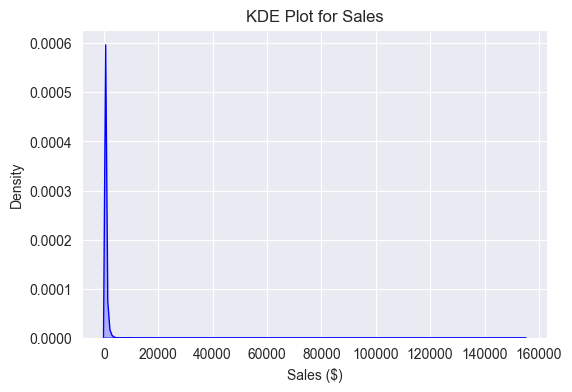

In [9]:
# KDE Plot for SALES
plt.figure(figsize=(6, 4))
sns.kdeplot(data['SALES'], shade=True, color='blue')
plt.title('KDE Plot for Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Density')
plt.show()

In [10]:
#Function To Make plotting easier
def create_boxplot(data,x=None,y=None,xlabel=None,ylabel=None,title=None):
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

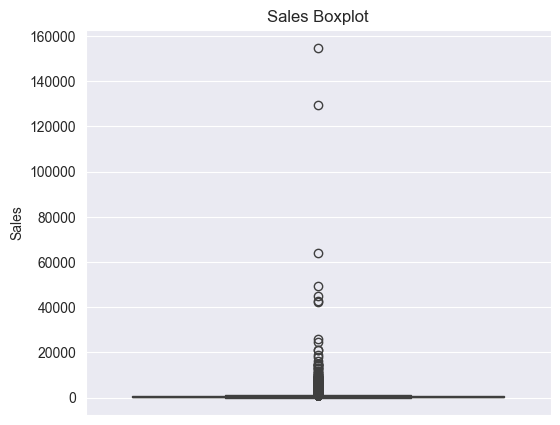

In [11]:
#Create boxplot for sales
create_boxplot(data,y="SALES",title="Sales Boxplot",ylabel="Sales")

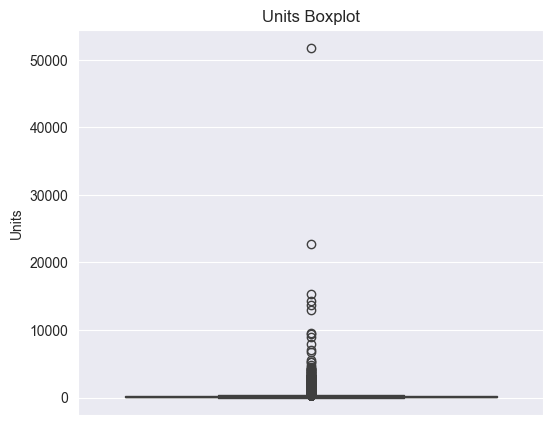

In [12]:
#Create boxplot for units
create_boxplot(data,y="UNITS",title="Units Boxplot",ylabel="Units")

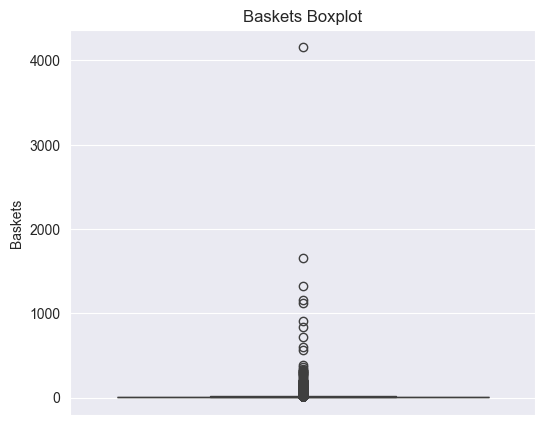

In [13]:
#Create boxplot for units
create_boxplot(data,y="BASKETS",title="Baskets Boxplot",ylabel="Baskets")

In [ ]:
# ## COMMENTS
# The distributions are right skilled
# Presence of outliers in all categories, a transformation might be need to normalise the data

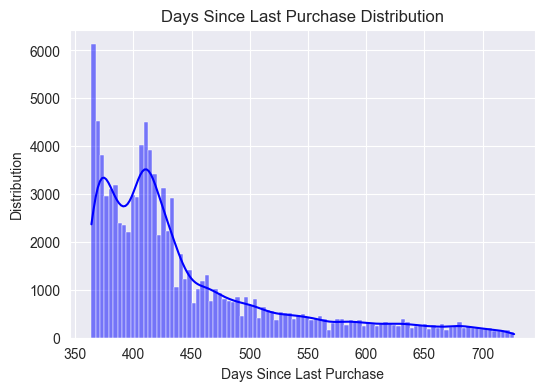

In [14]:
# Histogram for Days Since Last Purchae
plt.figure(figsize=(6, 4))
sns.histplot(data['Days Since Last Purchase'],  color='blue',kde=True)
plt.title('Days Since Last Purchase Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Distribution')
plt.show()

In [60]:

# Calculate and print skewness for each column
print("Skewness of SALES:", data['SALES'].skew())
print("Skewness of UNITS:", data['UNITS'].skew())
print("Skewness of BASKETS:", data['BASKETS'].skew())
print("Skewness of Days Since Last Purchase:", data['Days Since Last Purchase'].skew())


Skewness of SALES: 89.35091511150057
Skewness of UNITS: 78.87933586224516
Skewness of BASKETS: 118.02503404704196
Skewness of Days Since Last Purchase: 1.4851905586782677


In [15]:
#Apply log transformation to reduce skewness
data['Log_SALES'] = np.log(data['SALES'] + 1)  # Add 1 to avoid log(0)
data['Log_UNITS'] = np.log(data['UNITS'] + 1)
data['Log_BASKETS'] = np.log(data['BASKETS'] + 1)


In [16]:
print("Skewness of Log_SALES:", data['Log_SALES'].skew())
print("Skewness of Log_UNITS:", data['Log_UNITS'].skew())
print("Skewness of Log_BASKETS:", data['Log_BASKETS'].skew())

Skewness of Log_SALES: -0.26455493992301304
Skewness of Log_UNITS: -0.14370854128245505
Skewness of Log_BASKETS: 0.5337416236210787


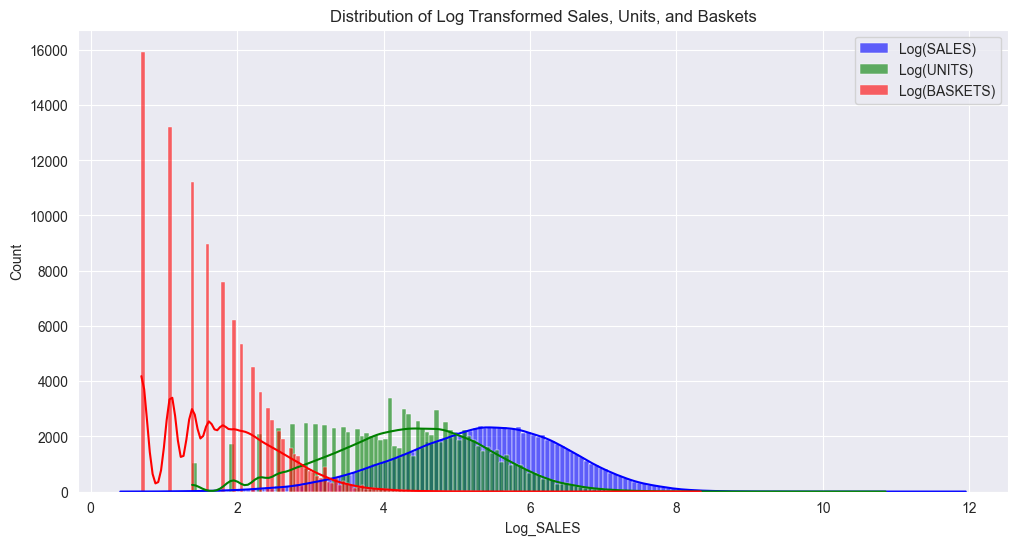

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the transformed data
plt.figure(figsize=(12, 6))
sns.histplot(data['Log_SALES'], kde=True, color='blue', label='Log(SALES)', alpha=0.6)
sns.histplot(data['Log_UNITS'], kde=True, color='green', label='Log(UNITS)', alpha=0.6)
sns.histplot(data['Log_BASKETS'], kde=True, color='red', label='Log(BASKETS)', alpha=0.6)
plt.legend()
plt.title('Distribution of Log Transformed Sales, Units, and Baskets')
plt.show()


In [ ]:
# Bivariate analysis

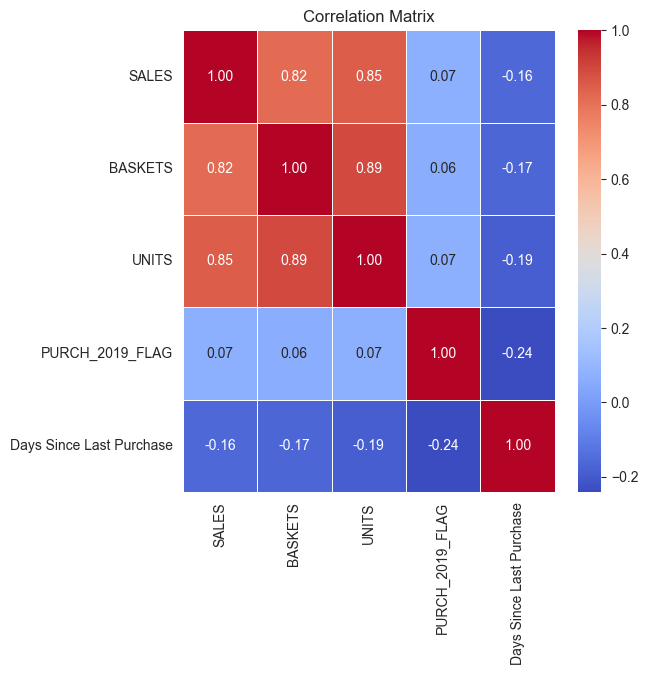

In [19]:
# Relationship between the variable
# Calculate the correlation matrix
corr_matrix = num_columns.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix , annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [65]:
num_columns

,SALES,BASKETS,UNITS,PURCH_2019_FLAG,Days Since Last Purchase
0,79.320,1,30,0,419
1,209.160,2,66,0,429
2,1.780,1,3,0,593
3,291.700,1,45,0,562
4,90.680,2,18,0,647
...,...,...,...,...,...
99697,167.460,3,153,0,557
99698,188.940,3,45,0,406
99699,50.180,2,15,0,458
99700,149.720,6,60,0,505


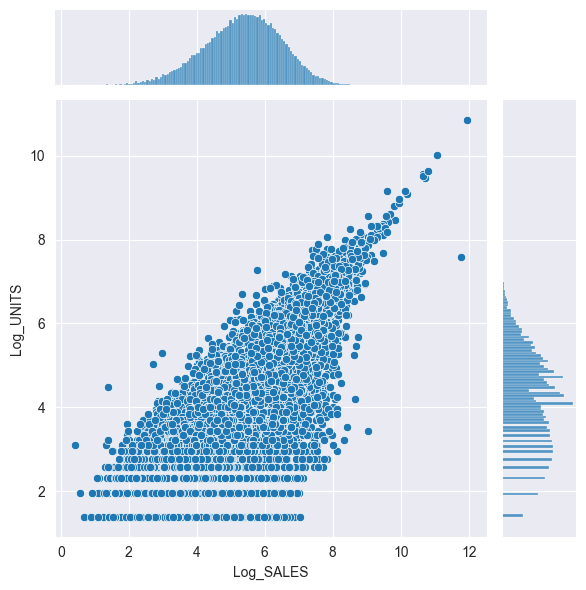

In [20]:
sns.jointplot(x='Log_SALES', y='Log_UNITS', kind='scatter', data=data)
plt.show()


In [23]:
# Aggregate data by date
time_data = data.groupby('LAST_PURCH_DATE')[['SALES', 'UNITS', 'BASKETS']].sum().reset_index()
time_data


,LAST_PURCH_DATE,SALES,UNITS,BASKETS
0,2018-02-04,2099.780,825,41
1,2018-02-05,2311.980,858,31
2,2018-02-06,3586.600,1050,40
3,2018-02-07,1965.400,840,36
4,2018-02-08,2121.200,1053,33
...,...,...,...,...
357,2019-01-29,608894.112,222474,13241
358,2019-01-30,619212.554,231303,13030
359,2019-01-31,862157.078,320622,18679
360,2019-02-01,1506556.258,505521,31918


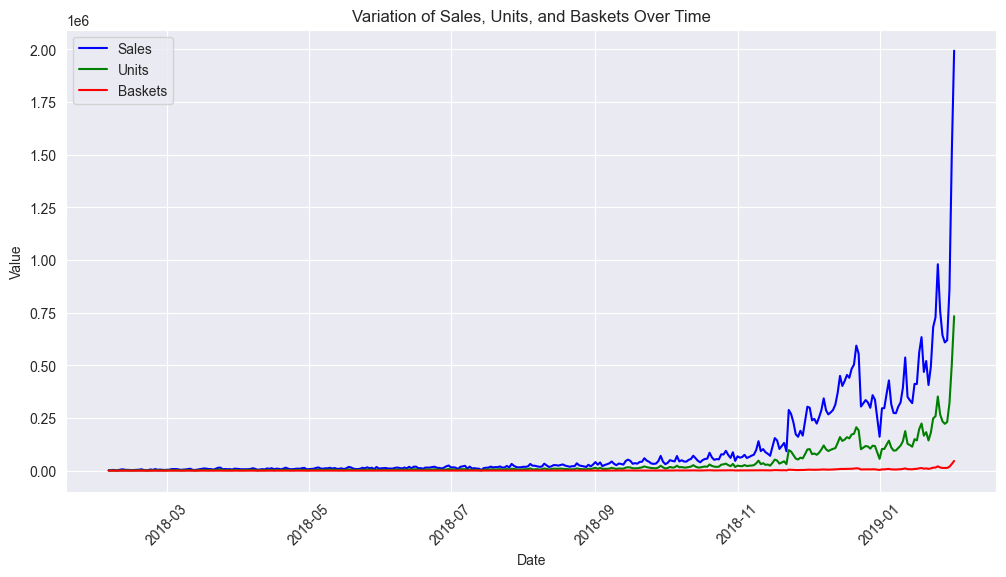

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='LAST_PURCH_DATE', y='SALES', data=time_data, label='Sales', color='blue')
sns.lineplot(x='LAST_PURCH_DATE', y='UNITS', data=time_data, label='Units', color='green')
sns.lineplot(x='LAST_PURCH_DATE', y='BASKETS', data=time_data, label='Baskets', color='red')
plt.title('Variation of Sales, Units, and Baskets Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()


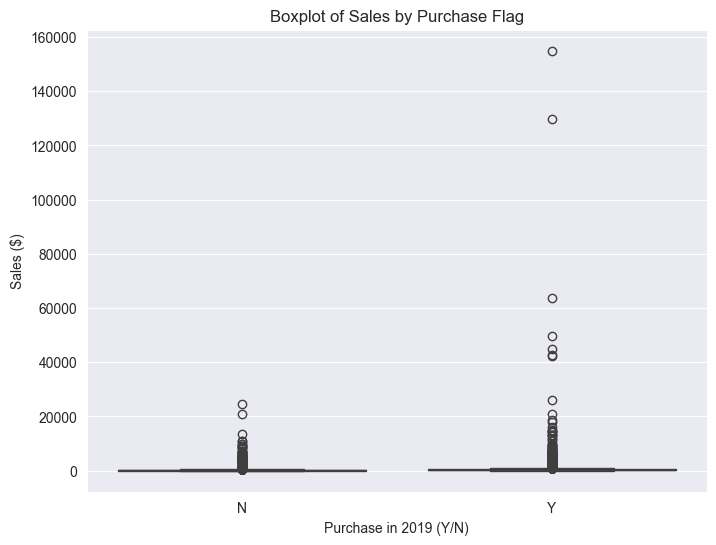

In [7]:
# Boxplot of SALES grouped by PURCH_2019_FLAG
plt.figure(figsize=(8, 6))
sns.boxplot(x='PURCH_2019_FLAG', y='SALES', data=data)
plt.title('Boxplot of Sales by Purchase Flag')
plt.xlabel('Purchase in 2019 (Y/N)')
plt.ylabel('Sales ($)')
plt.show()

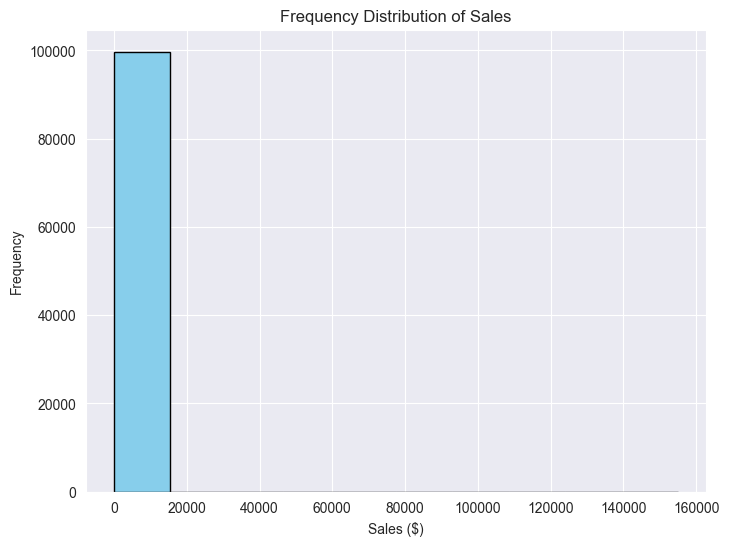

In [21]:
# Frequency distribution (Histogram) for SALES
plt.figure(figsize=(8, 6))
plt.hist(data['SALES'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.show()

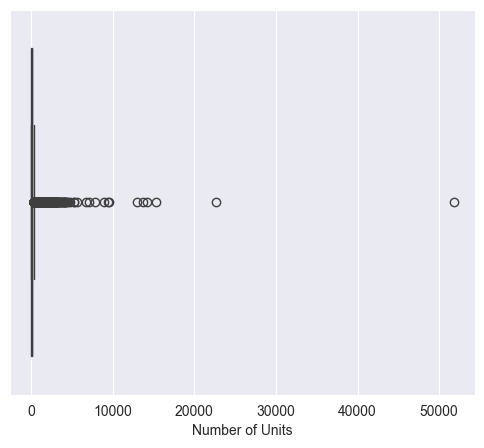

In [19]:
#Boxplot for UNITS
create_boxplot(data,x='UNITS',xlabel="Number of Units")

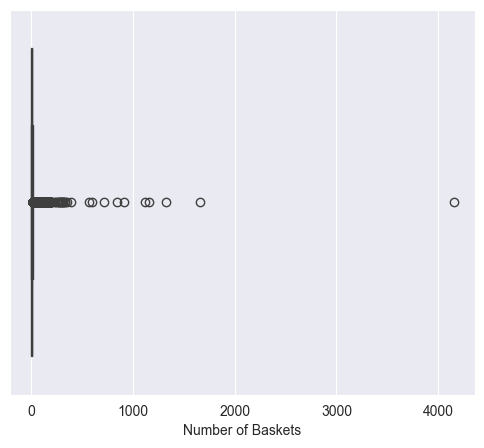

In [20]:
#Plot boxplot for baskets
create_boxplot(data,x="BASKETS",xlabel="Number of Baskets")

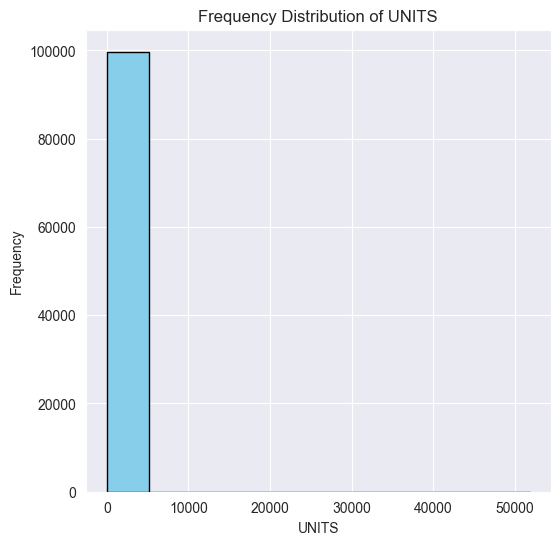

In [30]:
# Frequency distribution (Histogram) for UNITS
plt.figure(figsize=(6, 6))
plt.hist(data['UNITS'], color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of UNITS')
plt.xlabel('UNITS')
plt.ylabel('Frequency')
plt.show()

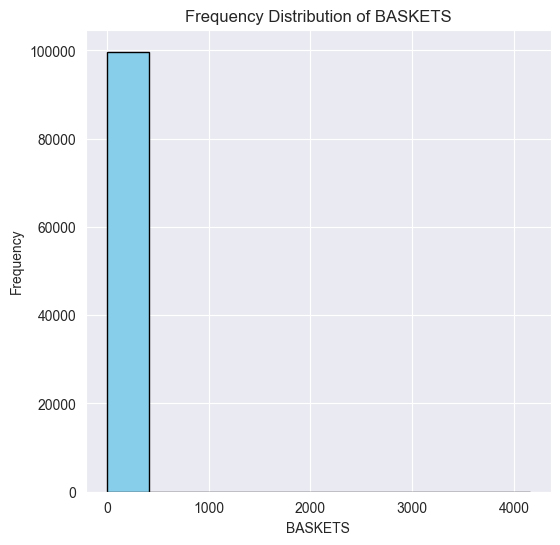

In [26]:
# Frequency distribution (Histogram) for BASKETS
plt.figure(figsize=(6, 6))
plt.hist(data['BASKETS'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of BASKETS')
plt.xlabel('BASKETS')
plt.ylabel('Frequency')
plt.show()

# Bivariate Relationships

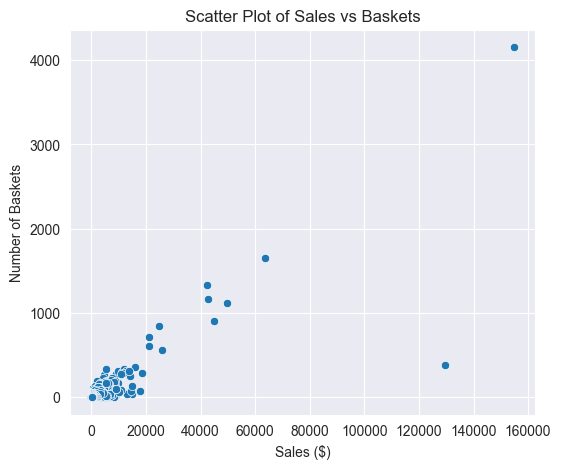

In [32]:
# Scatter Plot for Sales Vs Baskets
plt.figure(figsize=(6, 5))
sns.scatterplot(x='SALES', y='BASKETS', data=data)
plt.title('Scatter Plot of Sales vs Baskets')
plt.xlabel('Sales ($)')
plt.ylabel('Number of Baskets')
plt.show()

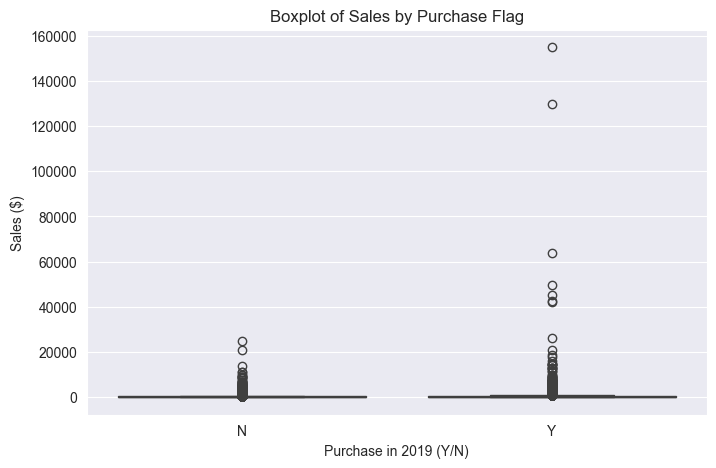

In [34]:
#Purchase flag and Sales
plt.figure(figsize=(8, 5))
sns.boxplot(x='PURCH_2019_FLAG', y='SALES', data=data)
plt.title('Boxplot of Sales by Purchase Flag')
plt.xlabel('Purchase in 2019 (Y/N)')
plt.ylabel('Sales ($)')
plt.show()
